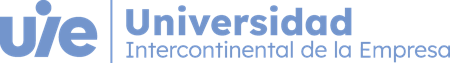

**G24GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2024-25

In [147]:
__author__ = "Víctor Vega Sobral"

# PL06. Clustering

In this practice we will use the *K-means* _scratch_ implementation achieved in the previous _notebook_, which will be contrasted with the Scikit-Learn library implementation. To test the clustering algorithms, the [_Facebook Live Sellers in Thailand_](https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand) dataset from UCI Machine Learning Repository will be used. This dataset describes live broadcasts by Thai sellers on Facebook.

The dataset must be imported, perform a brief EDA to understand the structure of the data and proceed with the corresponding transformations. Subsequently, the mentioned *K-means* implementations should be used using the elbow method to determine the optimal number of clusters.


In [148]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd


In [149]:
TEST_SPLIT_SIZE = 0.2
RANDOM_STATE = 23

# Set NumPy's random seed
np.random.seed(RANDOM_STATE)

## Dataset loading

In [ ]:
# Load data from csv 
df = pd.read_csv('datos_facebook.csv', index_col = 0)

# Verify dataframe structure
print(f"Complete dataframe dimensions {df.shape}")

# Inspection of the first records of the dataframe
print("First records of the complete dataset")
print(df.head())


Dimensiones del dataframe completo (7050, 15)
Primeros registros del dataset completo
          status_type status_published  num_reactions  num_comments  \
status_id                                                             
1               video   4/22/2018 6:00            529           512   
2               photo  4/21/2018 22:45            150             0   
3               video   4/21/2018 6:17            227           236   
4               photo   4/21/2018 2:29            111             0   
5               photo   4/18/2018 3:22            213             0   

           num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
status_id                                                                    
1                 262        432         92         3          1         1   
2                   0        150          0         0          0         0   
3                  57        204         21         1          1         0   
4                   0     

## Dataset EDA

Detection and treatment of null values, _outliers_, etc. Removal of non-relevant columns.

In [ ]:
# Number of rows and columns

num_rows, num_columns = df.shape[0] , df.shape[1]

message = f"""
\n ****** NUMBER OF ROWS/COLUMNS ******\n

 The number of rows is {num_rows + 1} \n
 The number of columns is {num_columns + 1}

"""
print(message)



 ****** NUMERO DE FILAS/COLUMNAS ******


 El numero de filas es de 7051 

 El numero de columnas es de 16




In [ ]:
# Data types
print("\n ******DATA TYPES****** \n")
print(df.dtypes)
df.head()


 ******TIPOS DE DATOS****** 

status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object


status_type status_published  num_reactions  num_comments  \
status_id                                                             
1               video   4/22/2018 6:00            529           512   
2               photo  4/21/2018 22:45            150             0   
3               video   4/21/2018 6:17            227           236   
4               photo   4/21/2018 2:29            111             0   
5               photo   4/18/2018 3:22            213             0   

           num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
status_id                                                                    
1                 262        432         92         3          1         1   
2                   0        150          0         0          0         0   
3                  57        204         21         1          1         0   
4                   0        111          0         0          0         0   
5                   0        204          9         0          0         0   

           num_angrys  Column1  Column2  Column3  Column4  
status_id                                                  
1                   0      NaN      NaN      NaN      NaN  
2                   0      NaN      NaN      NaN      NaN  
3                   0      NaN      NaN      NaN      NaN  
4                   0      NaN      NaN      NaN      NaN  
5                   0      NaN      NaN      NaN      NaN

In [ ]:
# # 1. View specific columns using their name
# print(df[['Column1', 'Column2', 'Column3', 'Column4']])

# Remove columns 'Column1', 'Column2', 'Column3' and 'Column4'
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

# Verify that columns have been removed
df.head()


status_type status_published  num_reactions  num_comments  \
status_id                                                             
1               video   4/22/2018 6:00            529           512   
2               photo  4/21/2018 22:45            150             0   
3               video   4/21/2018 6:17            227           236   
4               photo   4/21/2018 2:29            111             0   
5               photo   4/18/2018 3:22            213             0   

           num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
status_id                                                                    
1                 262        432         92         3          1         1   
2                   0        150          0         0          0         0   
3                  57        204         21         1          1         0   
4                   0        111          0         0          0         0   
5                   0        204          9         0          0         0   

           num_angrys  
status_id              
1                   0  
2                   0  
3                   0  
4                   0  
5                   0

## Categorical variable encoding

In [ ]:
# Encode the status_published variable
# Convert to datetime: intermediate step to make 4 new columns

df['status_published'] = pd.to_datetime(df['status_published'], format='%m/%d/%Y %H:%M')

# Extract useful components
df['year'] = df['status_published'].dt.year
df['month'] = df['status_published'].dt.month
df['day'] = df['status_published'].dt.day
df['hour'] = df['status_published'].dt.hour
df['minute'] = df['status_published'].dt.minute

# Remove original column if no longer needed
df.drop('status_published', axis=1, inplace=True)

df.head()

status_type  num_reactions  num_comments  num_shares  num_likes  \
status_id                                                                   
1               video            529           512         262        432   
2               photo            150             0           0        150   
3               video            227           236          57        204   
4               photo            111             0           0        111   
5               photo            213             0           0        204   

           num_loves  num_wows  num_hahas  num_sads  num_angrys  year  month  \
status_id                                                                      
1                 92         3          1         1           0  2018      4   
2                  0         0          0         0           0  2018      4   
3                 21         1          1         0           0  2018      4   
4                  0         0          0         0           0  2018      4   
5                  9         0          0         0           0  2018      4   

           day  hour  minute  
status_id                     
1           22     6       0  
2           21    22      45  
3           21     6      17  
4           21     2      29  
5           18     3      22

In [ ]:
# Convert status_type with dummies and keep status_type_photo

df = pd.get_dummies(df, columns=['status_type'])

df.drop('status_type_status', axis = 1, inplace = True)
df.head()

num_reactions  num_comments  num_shares  num_likes  num_loves  \
status_id                                                                  
1                    529           512         262        432         92   
2                    150             0           0        150          0   
3                    227           236          57        204         21   
4                    111             0           0        111          0   
5                    213             0           0        204          9   

           num_wows  num_hahas  num_sads  num_angrys  year  month  day  hour  \
status_id                                                                      
1                 3          1         1           0  2018      4   22     6   
2                 0          0         0           0  2018      4   21    22   
3                 1          1         0           0  2018      4   21     6   
4                 0          0         0           0  2018      4   21     2   
5                 0          0         0           0  2018      4   18     3   

           minute  status_type_link  status_type_photo  status_type_video  
status_id                                                                  
1               0             False              False               True  
2              45             False               True              False  
3              17             False              False               True  
4              29             False               True              False  
5              22             False               True              False

In [ ]:
# Correlation matrix


## Variable scaling

*K-means* is a distance-based algorithm, so it is convenient to scale the variables so that they all have the same weight.

In [157]:
# ...

## Clustering using _K-means_ _Scratch_

Use the Elbow method to determine the optimal number of clusters.

In [158]:
# ...

In [159]:
# ...

## Clustering using Scikit-Learn _K-means_

In [160]:
# ...

### Test with `k-means++` initialization

In [161]:
# ...

## Cluster explainability

Checking the distribution of instances in clusters and characterization of them.

In [162]:
# ...